<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h5> Sprint 8 Project:  Supervised Learning </h5>
    <h6> Project Description:</h6>
    <p>  Build a model for Beta Bank customers to predict whether a customer will leave the bank soon. Create a model with the maximum possible F1 score, additionally measure the AUC-ROC metric to compare it with the F1 score. The best model should create an F1 score of at least 0.59
    <h6> Project Plan:</h6>
    <p>(A) Import the data files and model libraries
    <p>=>>  (1) import library for TRAIN_TEST_SPLIT
    <p>=>>  (2) import libraries for model training (DecisionTreeClassifier, RandomForestClassifier, LogisticRegression)
    <p>=>>  (3) import libraries for model accuracy/quality (F1 Score, AUC-ROC)
    <p>  <br>    
    <p>(B) Study the data 
    <p>=>>  (1) import '/datasets/Churn.csv' (Beta Bank Customer data)
    <p>=>>  (2) df.info()
    <p>=>>  (3) df.isna()
    <p>=>>  (4) Fill all NAN values, if any are found (use median() value)
    <p>=>>  (5) Check if any duplicates present
    <p>=>>  (6) Plot Customer Group by 'Age' Distribution    
    <p>  <br>        
    <p>(C) Split the data, check the shape(), setup and tune hyperparameters, fit and train the model
    <p>=>>  (1) Split the data into a TRAINING, VALIDATION and TEST set (3:1:1 Model - 60%, 20% 20%)
    <p>=>>  (2) DF.SHAPE() to verify data split correctly into TRAINING, VALIDATION and TEST set (3:1:1 Model - 60%, 20% 20%)
    <p>=>>  (3) Create the FEATURES and TARGET variables from TRAIN, VALID and TEST datasets. Drop unnecessary columns that do not add value to model prediction power (RowNumber, CustomerId, Surname)
    <p>=>>  (4) One-Hot encoding for all "feature" categorical column (Geography, Gender) sets  
    <p>         >>>>>>>    (a)  Plot Top 5 Salaries per Geography Region, using One-Hot encoded feature sets
    <p>=>>  (5) Examine Class balance for 'EXITED' across "target" data sets
    <p>=>>  (6) Fit a basic DecisionTreeClassifier model 
    <p>         >>>>>>>    (a)  Evaluate using classification_report
    <p>         >>>>>>>    (b)  Use Cross-Validation to check model validity
    <p>         >>>>>>>    (c)  Add class_weight to model, re-fit, and check validity
    <p>         >>>>>>>    (d)  Check class_weight model validity
    <p>         >>>>>>>    (e)  Add tree depth minimum sample split and leaf parameters, re-fit, and check validity
    <p>         >>>>>>>    (f)  Re-Check class_weight F-1 model validity after more parameters added
    <p>=>>  (7) Fit a RandomForestClassifier model
    <p>         >>>>>>>    (a)  Fit model using TRAINING sets
    <p>         >>>>>>>    (b)  Predict and check model validity
    <p>         >>>>>>>    (c)  Check F1 Score
    <p>=>>  (8) Upsample and Shuffle, re-ckeck scores (RandomForestClassifier and LogisticRegression)
    <p>         >>>>>>>    (a)  Create UPSAMPLED Function (divide FEATURES and TARGET sets into zeros/ones, and increase ones)
    <p>         >>>>>>>    (b)  Shuffle UPSAMPLED set
    <p>         >>>>>>>    (c#1)  Create and fit a RandomForestClassifier model, and use GridSearchCV to improve quality for testing "valid(ation)" sets
    <p>         >>>>>>>    (c#2)  Create and fit a RandomForestClassifier model, and use GridSearchCV to improve quality for testing FINAL "test" sets
    <p>         >>>>>>>    (d)  Create and fit a LogisticRegression model
    <p>         >>>>>>>    (e)  Predict model
    <p>         >>>>>>>    (f)  Print and check F1 Score
    <p>=>>  (9) Create the ROC Curve on a LogisticRegression model
    <p>         >>>>>>>    (a)  Create a LogisticRegression model for an ROC Curve Plot
    <p>         >>>>>>>    (b)  Fit the model
    <p>         >>>>>>>    (c)  Run the predict_proba function on the model
    <p>         >>>>>>>    (d)  Plot the ROC Curve Plot
    <p>  <br>        
    <p>(D) Assess and report model results
    <p>  <br>            
 </div>

In [1]:
## Sprint 8 - (A)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier     
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV


In [2]:
## Sprint 8 - (B-1, B-2)

df = pd.read_csv('/datasets/Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
## Sprint 8 - (B-3)
##    Find if any NAN values exist

print(df.isna().sum())

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


In [4]:
## Sprint 8 - (B-4)
##    Fill all NAN values, if any are found

df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
print(f'Following is DF.ISNA() after FILLNA(0)\n{df.isna().sum()}')

Following is DF.ISNA() after FILLNA(0)
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [5]:
## Sprint 8 - (B-4)
##    Print SAMPLE of 'Tenure' == 4 (df['Tenure'].mean())

print()
df.head(10)[df['EstimatedSalary'] >= 100000]

/tmp/ipykernel_81/1168966774.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.head(10)[df['EstimatedSalary'] >= 100000]


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1


In [6]:
##  Sprint 8 - (B-5)
##     Check if any duplicates present

df.duplicated().sum()

0

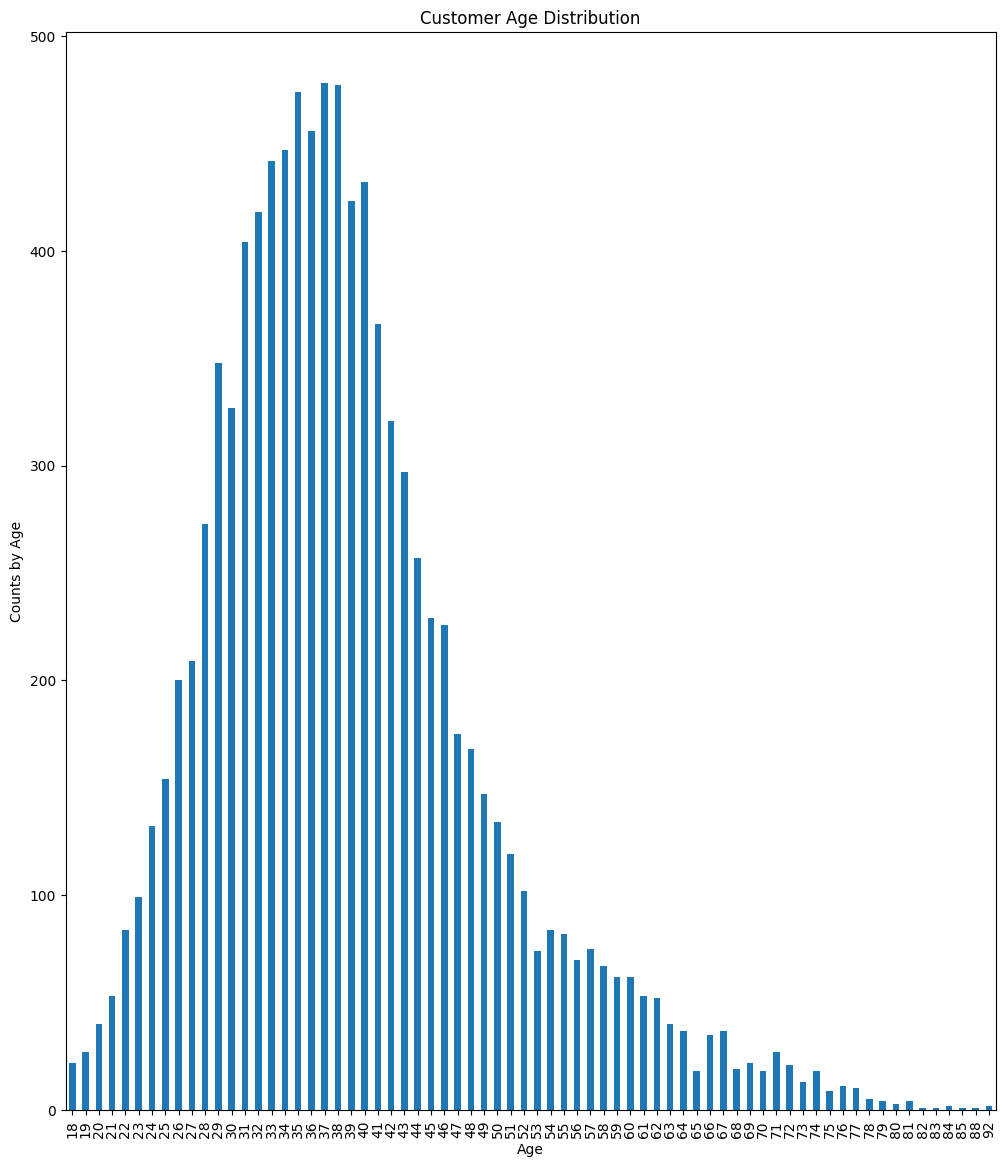

In [7]:
# Sprint 8 - (B-6)
#    Customer Age Distribution

df_groupby_age = df['Age'].value_counts().sort_index()
df_groupby_age.plot(kind='bar', figsize=(12, 14))
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts by Age')
plt.show()

In [8]:
## Sprint 8 - (C-1) 
##  Split the data into a TRAINING, VALIDATION and TEST set (3:1:1 Model - 60%, 20% 20%)

##  First split:  divide data into 60% train and 40% temp (this will become validation and test sets)
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=77)

##  Second split:  divide df_temp into df_valid and df_test into 20% validation and 20% test sets
df_valid, df_test = train_test_split(df_temp, test_size=0.5, random_state=77)

In [9]:
## Sprint 8 - (C-2) 
##   DF.SHAPE() check to verify that data split correctly into TRAIN, VALID and TEST set (3:1:1 Model - 60%, 20% 20%)

print('df_train shape:', df_train.shape)
print()
print('df_temp shape:', df_temp.shape)
print()
print('df_valid shape:', df_valid.shape)
print()
print('df_test shape:', df_test.shape)

df_train shape: (6000, 14)

df_temp shape: (4000, 14)

df_valid shape: (2000, 14)

df_test shape: (2000, 14)


In [10]:
##  Sprint 8 - (C-3)
##  Create the FEATURES and TARGET variables from TRAIN, VALID and TEST datasets
##     Drop unnecessary columns (RowNumber, CustomerId, Surname)

df_train_features = df_train.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
df_train_target = df_train['Exited']

df_valid_features = df_valid.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
df_valid_target = df_valid['Exited']

df_test_features = df_test.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
df_test_target = df_test['Exited']

print('df_train_features:', df_train_features.shape)
print('df_train_target:', df_train_target.shape)
print()
print('df_valid_features:', df_valid_features.shape)
print('df_valid_target:', df_valid_target.shape)
print()
print('df_test_features:', df_test_features.shape)
print('df_test_target:', df_test_target.shape)


df_train_features: (6000, 10)
df_train_target: (6000,)

df_valid_features: (2000, 10)
df_valid_target: (2000,)

df_test_features: (2000, 10)
df_test_target: (2000,)


In [11]:
##  Sprint 8 - (C-4)
##     One-Hot encoding for all "feature" categorical column (Geography, Gender) sets

df_train_features = pd.get_dummies(df_train_features, columns=['Geography', 'Gender'])   ##, drop_first=True)

df_valid_features = pd.get_dummies(df_valid_features, columns=['Geography', 'Gender'])   ##, drop_first=True)

df_test_features = pd.get_dummies(df_test_features, columns=['Geography', 'Gender'])   ###, drop_first=True)

print(df_train_features.shape)
print(df_train_target.shape)

print(df_valid_features.shape)
print(df_valid_target.shape)

print(df_test_features.shape)
print(df_test_target.shape)


(6000, 13)
(6000,)
(2000, 13)
(2000,)
(2000, 13)
(2000,)


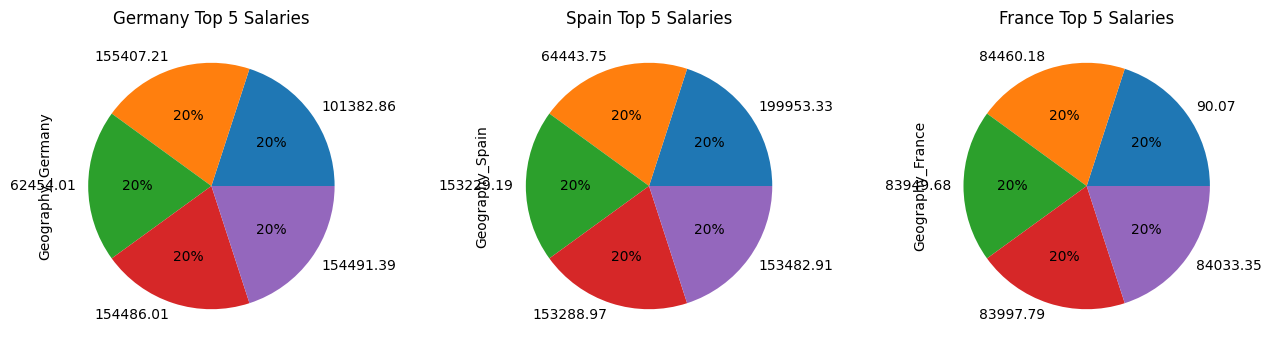

In [12]:
##  Sprint 8 - (C-4-a)
##     Display Top 5 Salaries per Geography Region, using One-Hot encoded feature sets

df_germany_top5_salary = df_train_features.groupby('EstimatedSalary')['Geography_Germany'].sum().sort_values(ascending=False).reset_index()[:5]
df_spain_top5_salary = df_train_features.groupby('EstimatedSalary')['Geography_Spain'].sum().sort_values(ascending=False).reset_index()[:5]
df_france_top5_salary = df_train_features.groupby('EstimatedSalary')['Geography_France'].sum().sort_values(ascending=False).reset_index()[:5]

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
df_germany_top5_salary.plot(kind='pie', y='Geography_Germany', labels=df_germany_top5_salary['EstimatedSalary'], autopct='%1.0f%%', legend=False, ax=axes[0])
df_spain_top5_salary.plot(kind='pie', y='Geography_Spain', labels=df_spain_top5_salary['EstimatedSalary'], autopct='%1.0f%%', legend=False, ax=axes[1])
df_france_top5_salary.plot(kind='pie', y='Geography_France', labels=df_france_top5_salary['EstimatedSalary'], autopct='%1.0f%%', legend=False, ax=axes[2])

axes[0].set_title('Germany Top 5 Salaries')
axes[1].set_title('Spain Top 5 Salaries')
axes[2].set_title('France Top 5 Salaries')
plt.show()

In [13]:
## Sprint 8 - (C-5) 
##   Examine Class balance for 'EXITED' across "target" data sets

print('"df_train_target" value counts:\n',df_train_target.value_counts(normalize=True))
print()
print('"df_valid_target" value counts:\n',df_valid_target.value_counts(normalize=True))
print()
print('"df_test_target" value counts:\n',df_test_target.value_counts(normalize=True))
print()


"df_train_target" value counts:
 0    0.7925
1    0.2075
Name: Exited, dtype: float64

"df_valid_target" value counts:
 0    0.8055
1    0.1945
Name: Exited, dtype: float64

"df_test_target" value counts:
 0    0.7985
1    0.2015
Name: Exited, dtype: float64



In [14]:
## Sprint 8 - (C-6) 
##   Fit/Evaluate/Validate the DecisionTreeClassifier Model

model = DecisionTreeClassifier(random_state=77)
model.fit(df_train_features, df_train_target)
   

DecisionTreeClassifier(random_state=77)

In [15]:
## Sprint 8 - (C-6-a) 
##   Evaluate the Model

target_pred = model.predict(df_valid_features)

f1_value = f1_score(df_valid_target, target_pred)
print(f'DecisionTreeClassifier F1 Value: {f1_value}')
print()
print(classification_report(df_valid_target, target_pred))

DecisionTreeClassifier F1 Value: 0.5154894671623296

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1611
           1       0.50      0.53      0.52       389

    accuracy                           0.80      2000
   macro avg       0.69      0.70      0.70      2000
weighted avg       0.81      0.80      0.81      2000



In [16]:
## Sprint 8 - (C-6-b) 
##   Cross-Validation to check Model Validity

cv_score = cross_val_score(model, df_train_features, df_train_target, cv=4)

print("Cross-validation scores: ", cv_score)
print("Mean cross-validation score: ", cv_score.mean())


Cross-validation scores:  [0.79733333 0.78133333 0.78333333 0.78933333]
Mean cross-validation score:  0.7878333333333334


In [17]:
## Sprint 8 - (C-6-c) 
##   Add class_weight to model, re-fit, and check validity

model2 = DecisionTreeClassifier(class_weight='balanced', random_state=77)
model2.fit(df_train_features, df_train_target)
   
target_pred2 = model2.predict(df_valid_features)
f1_value = f1_score(df_valid_target, target_pred2)
print(f'DecisionTreeClassifier #2 F1 Value: {f1_value}')
print()

print(classification_report(df_valid_target, target_pred2))

DecisionTreeClassifier #2 F1 Value: 0.48872180451127817

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1611
           1       0.48      0.50      0.49       389

    accuracy                           0.80      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.80      0.80      0.80      2000



In [18]:
## Sprint 8 - (C-6-d) 
##   Check class_weight F-1 model validity

cv_score2 = cross_val_score(model2, df_train_features, df_train_target, cv=4, scoring='f1_macro')

print("Cross-validation F1 scores: ", cv_score2)
print("Mean cross-validation score: ", cv_score2.mean())


Cross-validation F1 scores:  [0.69553679 0.68118499 0.67527259 0.67588483]
Mean cross-validation score:  0.6819698005181949


In [19]:
## Sprint 8 - (C-6-e) 
##   Add tree depth minimum sample split and leaf parameters, re-fit, and check validity

model3 = DecisionTreeClassifier(class_weight='balanced', random_state=77, max_depth=8, min_samples_leaf=9, min_samples_split=17)
model3.fit(df_train_features, df_train_target)
   
target_pred3 = model3.predict(df_valid_features)

f1_value = f1_score(df_valid_target, target_pred3)
print(f'DecisionTreeClassifier #3 F1 Value: {f1_value}')
print()

print(classification_report(df_valid_target, target_pred2))

DecisionTreeClassifier #3 F1 Value: 0.5631067961165049

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1611
           1       0.48      0.50      0.49       389

    accuracy                           0.80      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.80      0.80      0.80      2000



In [20]:
## Sprint 8 - (C-6-f) 
##   Re-Check class_weight F-1 model validity after more parameters added

cv_score3 = cross_val_score(model3, df_train_features, df_train_target, cv=4, scoring='f1_macro')

print("Cross-validation F1 scores: ", cv_score3)
print("Mean cross-validation score: ", cv_score3.mean())


Cross-validation F1 scores:  [0.69502591 0.7080323  0.68677204 0.69659091]
Mean cross-validation score:  0.696605288124158


In [21]:
## Sprint 8 - (C - 7 - a, b, c) 
##    RANDOM FOREST CLASSIFIER SECTION
##       Fit/Evaluate/Validate the RandomForestClassifier Model

ran_model = RandomForestClassifier(class_weight='balanced')
ran_model.fit(df_train_features, df_train_target)

y_pred_ran = ran_model.predict(df_valid_features)
f1_ran_score = f1_score(df_valid_target, y_pred_ran)

print(f1_ran_score)

0.5941807044410413


In [22]:
## Sprint 8 - (C - 8 - a - b) 
##       Create UPSAMPLE Function (divide FEATURES and TARGET sets into zeros/ones, and increase ones)
##       Shuffle UPSAMPLED Feature and Target sets
##       Call "upsample" function

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=77
    )

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(df_train_features, df_train_target, 3)



In [23]:
## Sprint 8 - (C - 8 - c#1) 
##       Create and fit a RandomForestClassifier model, and use GridSearchCV for testing "valid(ation)" sets
##       Using GridSearchCV to improve model quality

model = RandomForestClassifier(random_state=77)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
grid_search.fit(features_upsampled, target_upsampled)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(df_valid_features)
f1 = f1_score(df_valid_target, y_pred)

print(f'BEST VALIDATION RandomForestClassifier F1 Score: {f1}')

BEST VALIDATION RandomForestClassifier F1 Score: 0.6336898395721926


In [24]:
## Sprint 8 - (C - 8 - c#2) 
##       Create and fit a RandomForestClassifier model, and use GridSearchCV for testing FINAL "test" sets
##       Using GridSearchCV to improve model quality

best_model = grid_search.best_estimator_

y_pred = best_model.predict(df_test_features)
f1 = f1_score(df_test_target, y_pred)
roc_auc = roc_auc_score(df_test_target, best_model.predict_proba(df_test_features)[:, 1])

print(f'BEST FINAL RandomForestClassifier F1 Score: {f1}')
print(f'RandomForestClassifier ROC AUC: {roc_auc}')

BEST FINAL RandomForestClassifier F1 Score: 0.608
RandomForestClassifier ROC AUC: 0.8464669331920427


In [25]:
## Sprint 8 - (C - 8 - d - e - f) 
##    LOGISTIC REGRESSION SECTION
##     Create and fit a LogisticRegression model (use the UPSAMPLED sets)
##     Predict model
##     Print and check F1 Score

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)

log_predicted_valid = model.predict(df_valid_features)

print('Logistic Regression F1 Score:', f1_score(df_valid_target, log_predicted_valid))


Logistic Regression F1 Score: 0.42334322453016815


In [26]:
## Sprint 8 - (C - 9 - a - b - c) 
##         Fit the model
##         Run the predict_proba function on the model

roc_model = LogisticRegression(random_state=12345, solver='liblinear')
roc_model.fit(df_train_features, df_train_target)

probabilities_valid = model.predict_proba(df_valid_features)
probabilities_one_valid = probabilities_valid[:, 1]

roc_auc_score = roc_auc_score(df_valid_target, probabilities_one_valid)

print(f'AUC-ROC Score: {roc_auc_score}')


AUC-ROC Score: 0.7127811846256218


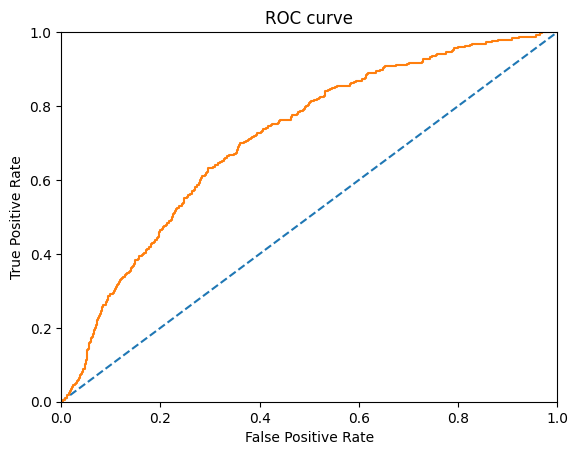

In [27]:
## Sprint 8 - (C - 9 - d) 
##         Plot the ROC Curve on the model

fpr, tpr, thresholds = roc_curve(df_valid_target, probabilities_one_valid) 

plt.figure()
# < plot the graph >
# ROC curve for random model (looks like a straight line)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, label='ROC Curve')

# < use the functions plt.xlim() and plt.ylim() to
#   set the boundary for the axes from 0 to 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()


<div class="alert alert-block alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h5> Sprint 8 Project:  Supervised Learning </h5>
    <h6> Sprint 8 - (D) - Project Assessment and Results:</h6>
    <p>(A) Data preparation
    <p>=>>  (1) Functions INFO() and ISNA() displayed the data types and NaN values [B-2]
    <p>=>>  (2) Column 'Tenure' NaN values were filled with 0's [B-3, B-4]
    <p>=>>  (3) Unneccessary columns to the calculations were dropped [B-5 - 'RowNumber', 'CustomerId', 'Surname']
    <p>=>>  (4) Split the data into a TRAINING, VALIDATION and TEST set (3:1:1 Model - 60%, 20% 20%)
    <p>=>>  (5) Ran DF.SHAPE() to verify data split correctly into TRAINING, VALIDATION and TEST set (using the 3:1:1 model)
    <p>=>>  (6) Created the FEATURES and TARGET variables from TRAIN, VALID and TEST datasets.
    <p>=>>  (7) Added One-Hot encoding for all "feature" categorical column (Geography, Gender) sets       
    <p>  <br>    
    <p>(B) Balance of Classes
    <p>=>>  (1) Added class weight adjustments to DecisionTreeClassifier [C-4-c]
    <p>=>>  (2) Examine Class balance for 'EXITED' by calling VALUE_COUNTS() Function
    <p>  <br>        
    <p>(C) Fit a basic DecisionTreeClassifier model without weight adjustments
    <p>=>>  (1) No class imbalance accounted for [C-4_a]
    <p>  <br>        
    <p>(D) Research Findings
    <p>=>>  (1) Value_counts() revealed great discrepancies on the "Exited" class across "target" data sets [C-5-a]
    <p>=>>  (2) The intial F1 score is not very strong either, at 0.5056603773584906 [C-6-a]
    <p>=>>  (3) Cross validation performance is not strong, calculated in the high 70's for the basic DecisionTreeClassifier model. [C-6-b]
    <p>=>>  (4) When a class weight was added to the model, the support values or the F1 score did not increase by much [C-6-c]
    <p>=>>  (5) Cross Validation performance actually dropped into high 60's [C-6-d]
    <p>=>>  (6) Adding tree depth, minimum sample split, and leaf parameters helped to increase the F1 score to 0.5636540330417882 But the classification report values remianed about the same [C-6-e}
    <p>=>>  (7) Cross validation values did not change by much at all [C-6-f]
    <p>=>>  (8) An initial RandomForestClassifier model produced an F1 score of 0.5833333333333334, a little bit higher than the DecisionTreeClassifier model value in #6, but not by much [C-7]
    <p>=>>  (9) RandomForestClassifier that employed the 'upsample' methodology, produced a passing F1 score, at 0.6042780748663101 [C-8-c]        
    <p>=>>  (9) LogisticRegression employed the 'upsample' methodology, but this produced a lower F1 score, at just 0.4334677419354839 [C-8-d-e-f]
    <p>=>>  (10) A LogisticRegression ROC plot shows the not so strong curve 
    <p>  <br>        
    <p>(E) The BEST model with an F1 score of at least 0.59 is the RandomForestClassifier #9, with an F1 Score Value: 0.6042780748663101
    <p>  <br>            
 </div>